## GNFR A - Temporal profiles
Based on power statistics from relevant powerplants.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import os 
import pandas as pd

In [2]:
# import files
folder = '../data/GNFR A/power statistics/'

file_dict = {'HKW_Nord': 'Heizkraftwerk_M_nchen_Nord_2_201901010000_202412312359_Stunde.csv', 
             'HKW_Süd_GUD1': 'GuD_M_nchen_S_d_1_201901010000_202412312359_Stunde.csv',
             'HKW_Süd_GUD2': 'GuD_M_nchen_S_d_2_201901010000_202412312359_Stunde.csv',
}

In [3]:
def load_file(file_name, folder=folder):
    """Load a CSV file and return a DataFrame."""
    df = pd

    df = pd.read_csv(folder + file_name, sep=';', decimal=',')
    df.index = pd.to_datetime(df['Datum von'], format="%d.%m.%Y %H:%M")
    df.drop(columns=['Datum von', 'Datum bis'], inplace=True)

    # convert to numeric columns
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].str.replace(',', '.')
        else:
            df[c] = df[c].astype(float)
            
    df = df.apply(pd.to_numeric, errors='coerce')
    df.fillna(0, inplace=True)
    return df

In [4]:
hkw_nord = load_file(file_dict['HKW_Nord'])
hkw_süd_gud1 = load_file(file_dict['HKW_Süd_GUD1'])
hkw_süd_gud2 = load_file(file_dict['HKW_Süd_GUD2'])

# Prepare timeprofiles

**Format:**<br>
year, component, timestamp, scaling_factor

In [5]:
# time profiles for HKW Süd GuD1
for y in hkw_süd_gud1.index.year.unique():
    df = hkw_süd_gud1[hkw_süd_gud1.index.year == y].copy()
    df = pd.DataFrame(data = {'scaling factor': df.sum(axis=1) / df.sum(axis=1).mean()})
    df['year'] = y
    df['component'] = 'all'
    df['timestamp'] = df.index
    df[['year', 'component', 'timestamp', 'scaling factor']]\
        .to_csv(f'../data/GNFR A/timeprofiles/GNFR_A_HKW_Süd_GuD1_{y}.csv', index=False)

In [6]:
# time profiles for HKW Süd GuD2
for y in hkw_süd_gud2.index.year.unique():
    df = hkw_süd_gud2[hkw_süd_gud2.index.year == y].copy()
    df = pd.DataFrame(data = {'scaling factor': df.sum(axis=1) / df.sum(axis=1).mean()})
    df['year'] = y
    df['component'] = 'all'
    df['timestamp'] = df.index
    df[['year', 'component', 'timestamp', 'scaling factor']]\
        .to_csv(f'../data/GNFR A/timeprofiles/GNFR_A_HKW_Süd_GuD2_{y}.csv', index=False)

In [7]:
# time profiles for HKW Nord
for y in hkw_nord.index.year.unique():
    df = hkw_nord[hkw_nord.index.year == y].copy()
    for c in df.columns:
        block = c.split(' ')[1]
        df1 = pd.DataFrame(data = {'scaling factor': df[c] / df[c].mean()})
        df1['year'] = y
        df1['component'] = 'all'
        df1['timestamp'] = df.index
        df1[['year', 'component', 'timestamp', 'scaling factor']]\
            .to_csv(f'../data/GNFR A/timeprofiles/GNFR_A_HKW_Nord_Block{block}_{y}.csv', index=False)

<Axes: xlabel='Datum von'>

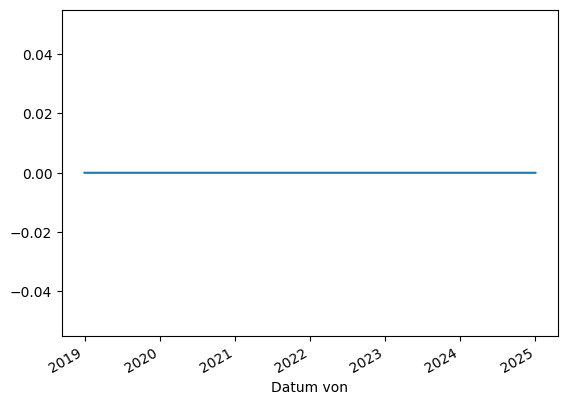

In [15]:
hkw_nord['Generation_DE T10 [MW] Originalauflösungen'].plot()